In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
import keras.datasets.mnist as mnist

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_test.shape

(10000, 28, 28)

In [6]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [7]:
x_train = x_train/255.0
x_test = x_test/255.0

In [8]:
class my_callback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy')>0.998:
      print("\nReached more than 99.8% accuracy, stopping trainining..!")
      self.model.stop_training = True

In [9]:
def create_model():
  model = keras.models.Sequential([keras.layers.Conv2D(64,(3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Conv2D(32, (3,3), activation='relu'),
                                 keras.layers.MaxPooling2D(pool_size=(2,2)),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(units=128, activation='relu'),
                                 keras.layers.Dense(units=10, activation='softmax')])
  return model

In [10]:
def compile_model():
  model = create_model()
  model.compile(optimizer=keras.optimizers.Adam(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
  return model

In [11]:
def fit_model():
  model = compile_model()
  model.fit(x_train, y_train, epochs=20, callbacks=[my_callback()])
  return model

In [12]:
model = fit_model()

Epoch 1/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1395 - accuracy: 0.9577
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0447 - accuracy: 0.9865
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0308 - accuracy: 0.9904
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0222 - accuracy: 0.9930
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0167 - accuracy: 0.9947
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0126 - accuracy: 0.9961
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0107 - accuracy: 0.9962
Epoch 8/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0088 - accuracy: 0.9971
Epoch 9/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0077 - accuracy: 0.9973
Epoch 10/20
1871/1875 [============================>.] - ETA: 0s - loss: 0.0055 - 

In [13]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0354 - accuracy: 0.9923


[0.035378117114305496, 0.9922999739646912]

In [14]:
classifications = model.predict(x_test)

In [15]:
classifications[500]

array([9.1870425e-27, 8.3263588e-16, 6.4196936e-24, 1.0000000e+00,
       3.4798047e-20, 1.5539553e-15, 1.3389683e-25, 1.4113231e-16,
       5.8848576e-19, 2.7791066e-14], dtype=float32)

In [16]:
predicted = np.where(classifications[500] == max(classifications[500]))

In [17]:
predicted

(array([3]),)

In [18]:
original = y_test[500]
original

3

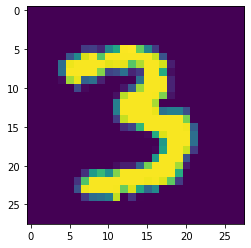

In [19]:
image500 = x_test[500].reshape(28,28)
plt.imshow(image500)